## Telecom Customer Churn Prediction | Machine Learning & Deep learning Implementation 

#### Loading Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import StandardScaler        #Vectorization

from sklearn.linear_model import LogisticRegression     #Logistic Regression
from sklearn.model_selection import train_test_split    #Spliting to test and train 
from sklearn.metrics import accuracy_score              #accuracy score

from sklearn.ensemble import RandomForestClassifier     # Random Forest Classfier

from sklearn.svm import SVC                             # Support vector Algorithm

from sklearn.decomposition import PCA   

import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [26]:
df = pd.read_csv('../data/telco.csv')

## Data Exploration

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.shape

(7043, 21)

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [32]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [33]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [34]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [35]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### This project aims to predict customer churn in the telecom industry using advanced machine learning and deep learning techniques. The dataset comprises 21 columns and 7043 entries with no missing values. Key features include Total Charges (to be converted from object to numeric), Monthly Charges, Tenure (duration of customer stay), and Senior Citizen (binary: 0 or 1). Churn is the dependent variable, while CustomerID serves as the unique identifier. By analyzing these features, the model identifies patterns and factors leading to churn, enabling proactive retention strategies.

## Data Preparation

#### Data Cleaning

In [37]:
try:
    df.TotalCharges = pd.to_numeric(df.TotalCharges)
except Exception as e:
    print(e)


Unable to parse string " " at position 488


##### it seems like Total charges has " " empty string in it.

In [38]:
df.shape

(7043, 21)

In [39]:
dfx = df[df.TotalCharges != ' ']
dfx.shape

(7032, 21)

##### we removed 9 entries that is " " empty string in total charges and transformed into new dataframe dfx. now data has 7032 entries.

In [40]:
dfx.TotalCharges = pd.to_numeric(dfx.TotalCharges)

## Data Visualization

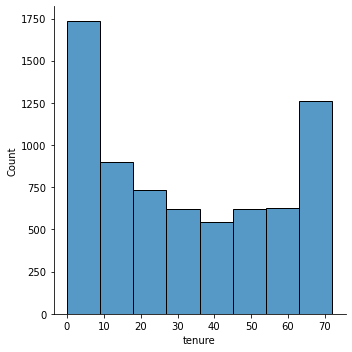

In [41]:
sns.displot(df.tenure, bins = 8)